In [21]:
# usual packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import h5py

import sys
#sys.modules.pop('CLASS_BABY')
#sys.modules.pop('CLASS_SAMPLE')


from CLASS_BABY import *
from CLASS_SAMPLE import *

import scipy.stats as ss

#bigger fonts
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})

# machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler#,Imputer

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# NEURAL NETWORK

In [4]:
## Read NHS data from table "average_properties.txt"
T = pd.read_csv('../TOST_data/average_properties.txt',sep='\t',index_col=0,na_values=-99)
T.columns.values

array(['BABY_IDS', 'GENDER', 'WEIGHT_GRAMS', 'GEST_AGE_DAYS', 'DELIVERY',
       'BIRTH_DATE', 'FILE', 'DELTA_SEC_MEASURE', 'MED_SPO2', 'MED_PR',
       'MED_PI', 'MEAN_SPO2', 'MEAN_PR', 'MEAN_PI', 'STD_SPO2', 'STD_PR',
       'STD_PI', 'PHN', 'WRIST', 'FOOT', 'BRADY_SEC_PR', 'BRADY_RATIO_PR',
       'BRADY_RATIO_PR_m10', 'BRADY_RATIO_PR_m20', 'BRADY_RATIO_PR_m30',
       'BRADY_RATIO_PR_m40', 'BRADY_SEC_SPO2', 'BRADY_RATIO_SPO2',
       'BRADY_SEC_PR_DYN', 'BRADY_RATIO_PR_DYN', 'BRADY_NUM_PER_HOUR_PR',
       'BRADY_NUM_PER_HOUR_PR_m10', 'BRADY_NUM_PER_HOUR_PR_m20',
       'BRADY_NUM_PER_HOUR_PR_m30', 'BRADY_NUM_PER_HOUR_PR_m40',
       'BRADY_NUM_PER_HOUR_PR_dyn', 'BRADY_NUM_PER_HOUR_PR_anytime',
       'BRADY_NUM_PER_HOUR_PR_m10_anytime',
       'BRADY_NUM_PER_HOUR_PR_m20_anytime',
       'BRADY_NUM_PER_HOUR_PR_m30_anytime',
       'BRADY_NUM_PER_HOUR_PR_m40_anytime',
       'BRADY_NUM_PER_HOUR_PR_dyn_anytime', 'BRADY_DURATION_MEDIAN_PR',
       'BRADY_DURATION_MEDIAN_PR_m10', 'BRAD

In [9]:
INPUT_COLUMNS = ['MED_PR',
                 'MEAN_PR',
                 'GEST_AGE_DAYS']
print(INPUT_COLUMNS,"\n")
print('Number of features: ',len(INPUT_COLUMNS))

['MED_PR', 'MEAN_PR', 'GEST_AGE_DAYS'] 

Number of features:  3


In [23]:
INPUT = []
for i in range(len(INPUT_COLUMNS)):
    INPUT.append(np.array(T[INPUT_COLUMNS[i]]))
INPUT = np.array(INPUT).T

In [11]:
INPUT.shape

(764, 3)

In [12]:
#OUTPUT = np.array(T['BRADY_RATIO_PR'])
OUTPUT = np.array(T['BRADY_NUM_PER_HOUR_PR'])

In [13]:
OUTPUT.shape

(764,)

In [14]:
# NORMALISATION
scaler = StandardScaler()
scaler.fit(INPUT)
INPUT_NORM = scaler.transform(INPUT)

In [15]:
# SPLIT TRAIN AND TEST
input_train,input_test, output_train, output_test = train_test_split(INPUT_NORM, OUTPUT, test_size=0.2)

In [17]:
print ("training sample size: ",len(input_train))
print ("test sample size: ",len(input_test))
print ("train + test (total sample) = ", len(input_train)+len(input_test))
print ("train / sample =", round(float(len(input_train))/float(len(INPUT_NORM)),1))
print ("test / sample =", round(float(len(input_test))/float(len(INPUT_NORM)),1))

training sample size:  611
test sample size:  153
train + test (total sample) =  764
train / sample = 0.8
test / sample = 0.2


In [19]:
# DEFINE MODEL ARCHITECTURE
model = Sequential()
model.add(Dense(12,input_dim=3,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='linear'))

In [20]:
# CREATE MODEL 
model.compile(loss='mean_absolute_error', 
              optimizer='adam',
              metrics=['accuracy'] )

In [22]:
# TRAIN THE MODEL

# stop training if after 10 iterations 
# the results has not improved
early_stopping = EarlyStopping(monitor='loss',
                               patience=10)

hist = model.fit(input_train,
                 output_train,
                 epochs=100,
                 shuffle=True,
                 batch_size=3,
                 callbacks=[early_stopping])

Epoch 1/100
611/611 [==============================] - 0s 642us/step - loss: 15.8356 - acc: 0.0065
Epoch 2/100
611/611 [==============================] - 0s 382us/step - loss: 12.5335 - acc: 0.0000e+00
Epoch 3/100
611/611 [==============================] - 0s 417us/step - loss: 10.5739 - acc: 0.0000e+00
Epoch 4/100
611/611 [==============================] - 0s 479us/step - loss: 9.8867 - acc: 0.0000e+00
Epoch 5/100
611/611 [==============================] - 0s 391us/step - loss: 9.5174 - acc: 0.0000e+00
Epoch 6/100
611/611 [==============================] - 0s 353us/step - loss: 9.2112 - acc: 0.0082
Epoch 7/100
611/611 [==============================] - 0s 442us/step - loss: 8.9674 - acc: 0.0295
Epoch 8/100
611/611 [==============================] - 0s 377us/step - loss: 8.8421 - acc: 0.0213
Epoch 9/100
611/611 [==============================] - 0s 353us/step - loss: 8.7241 - acc: 0.0278
Epoch 10/100
611/611 [==============================] - 0s 370us/step - loss: 8.6345 - acc: 0.0245


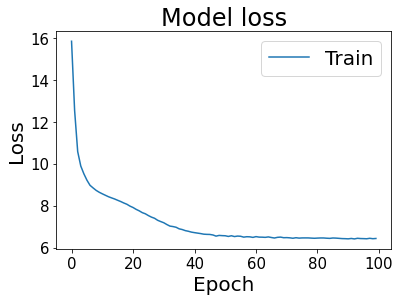

In [25]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [27]:
model.evaluate(input_test,output_test)[1]

153/153 [==============================] - 0s 310us/step


0.045751633694748474